## Data Analysis Mathematics, Algorithms and Modeling

# AI Powered Recipe Recommendation System 

### Team : Group 3
| Student No  | First Name                  | Last Name     |
|-------------|-----------------------------|---------------|
| 9041129     | Nidhi                       | Ahir          |
| 9016986     | Keerthi                     | Gonuguntla    |
| 9027375     | Khushbu                     | Lad           |

#### Introduction

In the next phase of recepe recommandation system, Data related to user feedback and rating are taken into consideration with the existing recepe data with a view to identify insights about user's preferences and engagement with the recepe. This will help to identify corelation between recepe characteristics and user preferences 

### Rectangular dataset : Raw_interaction.csv

Import Libraries

In [34]:
import pandas as pd 

#### Representing the new data set in classes and methods

In [35]:
class RawRecipe:
    def __init__(self):
        self.file_path = './Dataset/RAW_recipes.csv'
        self.data = None
    
    # Loads the data from a CSV file.
    def load_data(self):
        self.data = pd.read_csv(self.file_path)
        print(f"---> STEP 1 : Loads the data from a CSV file. \r\n")
        print(f"RAW_recipes.csv : Data loaded successfully.")
        print(f"Total Records : {self.data.shape[0]} \r\n")
        return self.data
    
class RecepeInteraction:
    def __init__(self):
        self.file_path = './Dataset/RAW_interactions.csv'
        self.data = None
    
    # Loads the data from a CSV file.
    def load_data(self):
        self.data = pd.read_csv(self.file_path)
        print(f"---> STEP 1 : Loads the data from a CSV file. \r\n")
        print(f"RAW_interactions.csv : Data loaded successfully.")
        print(f"Total Records : {self.data.shape[0]} \r\n")
        return self.data
    
    def view_sample_data(self):
        self.data.head(5)

    # Data quality : Null Check
    def check_null_values(self):
        print(f"---> STEP 2 : Null Check for data \r\n")
        if self.data is not None:
            nulls = self.data.isnull().sum()
            print(nulls)
            return nulls
        else:
            print("Data not loaded.")
     # Data quality : Duplicate Check
    def check_duplicate_values(self):
        print(f"\r\n---> STEP 3 : Duplicate data Check for recepe \r\n")
        if self.data is not None:
            counts = self.data["recipe_id"].value_counts()
            dupl = (counts[counts>1]).reset_index()
            dupl.columns = ["recipe_id", "Count"]
            print(dupl)
            return dupl
        else:
            print("Data not loaded.")

if __name__ == "__main__":

    # Create an instance of the RecepeInteraction  class and load data
    interactionData = RecepeInteraction()
    interactionData.load_data()

    # Create an instance of the RecepeInteraction  class and load data
    recepeData = RawRecipe()
    recepeData.load_data()


---> STEP 1 : Loads the data from a CSV file. 

RAW_interactions.csv : Data loaded successfully.
Total Records : 1132367 

---> STEP 1 : Loads the data from a CSV file. 

RAW_recipes.csv : Data loaded successfully.
Total Records : 231637 



In [36]:
interactionData.data.head(5)

,user_id,recipe_id,date,rating,review
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall..."
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin..."


This dataset appears to contain reviews and ratings for various recipes. Here's a breakdown of each column:

**user_id:** Unique identifier for the user who provided the rating/review.

**recipe_id:** Unique identifier for the recipe being rated/reviewed.

**date:** Date when the rating and review were provided.

**rating:** Numerical rating (on a scale of 0 to 5) given to the recipe.

**review:** User's textual review providing additional feedback or modifications to the recipe.

In [37]:

# Check for missing values
interactionData.check_null_values()

# Check duplicate values
interactionData.check_duplicate_values()

---> STEP 2 : Null Check for data 

user_id        0
recipe_id      0
date           0
rating         0
review       169
dtype: int64

---> STEP 3 : Duplicate data Check for recepe 

        recipe_id  Count
0            2886   1613
1           27208   1601
2           89204   1579
3           39087   1448
4           67256   1322
...           ...    ...
139679     205412      2
139680     207778      2
139681     219118      2
139682     414099      2
139683     253419      2

[139684 rows x 2 columns]


,recipe_id,Count
0,2886,1613
1,27208,1601
2,89204,1579
3,39087,1448
4,67256,1322
...,...,...
139679,205412,2
139680,207778,2
139681,219118,2
139682,414099,2


In [39]:
# Merge data using common field recepe Id
merged_data = pd.merge(recepeData.data, interactionData.data, left_on='id', right_on='recipe_id')
print("Data Merged Successfully")
merged_data.head(5)

Data Merged Successfully


,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients,user_id,recipe_id,date,rating,review
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7,4470,137739,2006-02-18,5,I used an acorn squash and recipe#137681 Swee...
1,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7,593927,137739,2010-08-21,5,This was a nice change. I used butternut squas...
2,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7,178427,137739,2011-12-05,5,Excellent recipe! I used butternut squash and ...
3,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6,28603,31490,2002-08-19,0,"Have not tried this, but it sounds delicious. ..."
4,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6,346277,31490,2006-08-27,5,This recipe was wonderful. Instead of using t...


### QQ Normal Plot

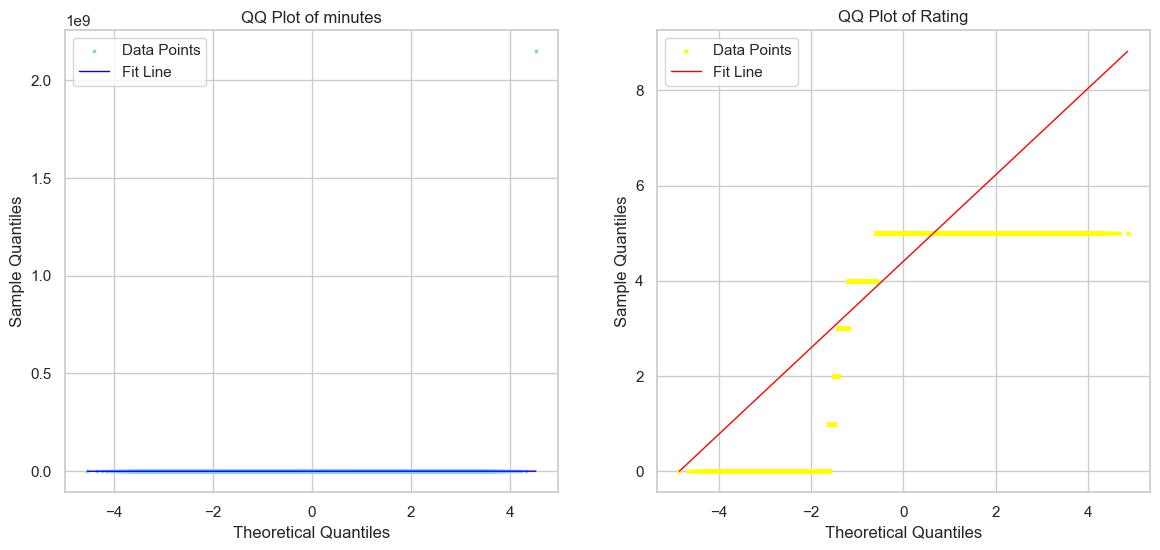

In [77]:
import matplotlib.pyplot as plt
import scipy.stats as zscore

recipe_id = recepeData.data["minutes"]  # Replace with your column
rating= interactionData.data["rating"]

def create_qq_plot(ax,data, title, line_color, line_width, point_color, point_size):
    (osm, osr), (slope, intercept, r) = zscore.probplot(data, dist="norm")
    
    # Plot the data points
    ax.scatter(osm, osr, color=point_color, s=point_size, label='Data Points')
    
    # Plot the fit line
    ax.plot(osm, slope * osm + intercept, color=line_color, lw=line_width, label='Fit Line')
    
    # Set title and labels for the subplot (ax)
    ax.set_title(f'QQ Plot of {title}')
    ax.set_xlabel('Theoretical Quantiles')
    ax.set_ylabel('Sample Quantiles')
    
    # Add legend and grid
    ax.legend()
    ax.grid(True)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # 1 row, 2 columns

# QQ Plot for Number of Ingredients
create_qq_plot(axes[0],recipe_id,'minutes',"blue",1,"skyblue",3)

# QQ Plot for Preparation Time
create_qq_plot(axes[1],rating, 'Rating',"red",1,"yellow",5)

##Correlation 


In [78]:
correlation = merged_data['minutes'].corr(merged_data['rating'])

print(f'Correlation coefficient between Variable1 and Variable2: {correlation}')

# Optionally, visualize the relationship using a scatter plot
# sns.scatterplot(x='id', y='rating', data=merged_data)
# plt.title('Scatter Plot of id vs rating')
# plt.xlabel('id')
# plt.ylabel('ratings')
# plt.show()

df = merged_data.apply(pd.to_numeric, errors = 'coerce')
corr_mat = df.corr()
print(corr_mat)

Correlation coefficient between Variable1 and Variable2: 0.0010534354642060928
                name        id   minutes  contributor_id  submitted  tags  \
name             NaN       NaN       NaN             NaN        NaN   NaN   
id               NaN  1.000000  0.003164        0.102952        NaN   NaN   
minutes          NaN  0.003164  1.000000       -0.000133        NaN   NaN   
contributor_id   NaN  0.102952 -0.000133        1.000000        NaN   NaN   
submitted        NaN       NaN       NaN             NaN        NaN   NaN   
tags             NaN       NaN       NaN             NaN        NaN   NaN   
nutrition        NaN       NaN       NaN             NaN        NaN   NaN   
n_steps          NaN  0.056699 -0.000438        0.027721        NaN   NaN   
steps            NaN       NaN       NaN             NaN        NaN   NaN   
description      NaN       NaN       NaN             NaN        NaN   NaN   
ingredients      NaN       NaN       NaN             NaN        NaN   NaN 

In [60]:
Zscore_steps = zscore.zscore(merged_data['rating'])
print(f"Z-Score for the steps\n ",Zscore_steps)

Z-Score for the steps
  0          0.465692
1          0.465692
2          0.465692
3         -3.487655
4          0.465692
             ...   
1132362    0.465692
1132363   -2.696986
1132364   -2.696986
1132365    0.465692
1132366   -3.487655
Name: rating, Length: 1132367, dtype: float64


In [59]:
sample_mean = merged_data['rating'].mean()
sample_std = merged_data['rating'].std()
n = len(merged_data['rating'])

# Specify the population mean (change as necessary)
population_mean = 0  # Update this to your population mean

# Calculate the t-score
t_score = (sample_mean - population_mean) / (sample_std / np.sqrt(n))

print(f"T-score for {'rating'}: {t_score}")

T-score for rating: 3711.3073279069586


### Shapiro-Wilk Normality Test

In [80]:
from scipy import stats

#data.columns = ['name', 'id', 'minutes', 'contributor_id', 'tags', 'nutrition', 'steps', 'submitted', 'n_steps', 'description', 'ingredients', 'n_ingredients']

# Select only numeric columns for the Shapiro-Wilk test
numeric_columns = merged_data.select_dtypes(include='number').columns

# Apply the Shapiro-Wilk test for normality on each numeric column
shapiro_results = {}

for column in numeric_columns:
    statistic, p_value = stats.shapiro(merged_data['rating'].dropna())  # Use dropna() to remove NaN values
    shapiro_results['rating'] = p_value

# Convert results to DataFrame for better visualization
shapiro_results_df = pd.DataFrame(list(shapiro_results.items()), columns=['rating', 'p_value'])

# Display the Shapiro-Wilk test results
print(shapiro_results_df)

numeric_columns = merged_data.select_dtypes(include='number').columns

# Apply the Shapiro-Wilk test for normality on each numeric column
shapiro_results = {}

for column in numeric_columns:
    statistic, p_value = stats.shapiro(merged_data['minutes'].dropna())  # Use dropna() to remove NaN values
    shapiro_results['minutes'] = p_value

# Convert results to DataFrame for better visualization
shapiro_results_df = pd.DataFrame(list(shapiro_results.items()), columns=['minutes', 'p_value'])

# Display the Shapiro-Wilk test results
print(shapiro_results_df)

c:\Users\ADMIN\Documents\data analysis\PROG8431\PROG8431\venvPROG8431\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 1132367.
  res = hypotest_fun_out(*samples, **kwds)


   rating        p_value
0  rating  1.141461e-211


c:\Users\ADMIN\Documents\data analysis\PROG8431\PROG8431\venvPROG8431\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 1132367.
  res = hypotest_fun_out(*samples, **kwds)


   minutes        p_value
0  minutes  1.678490e-240


#### Here P-Values is less than 0.05 for the both ratings and minutes so that our dta is normally distributed.


### F-TEST :

In [73]:
import pandas as pd
import numpy as np
from scipy import stats

# Sample data creation (assuming these are your dataframes)
# raw_recipes = pd.read_csv('path_to_your_recipes.csv')
# raw_interaction = pd.read_csv('path_to_your_interaction.csv')

# For demonstration, let's create dummy data
# Assuming these are your numerical columns of interest


# Extract the data to be tested
group1 = merged_data['minutes']
group2 = merged_data['rating']

# Perform the F-test
f_statistic, p_value = stats.levene(group1, group2)  # Use Levene's test for equality of variances

# Display the results
print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

# Interpret the results
alpha = 0.05  # Significance level
if p_value <= alpha:
    print("Reject the null hypothesis: Variances are significantly different.")
else:
    print("Accept the null hypothesis: Variances are not significantly different.")


F-statistic: 19.097777715681058
P-value: 1.2419492348719483e-05
Reject the null hypothesis: Variances are significantly different.


### Conclusion : 

### Wilcox Test 

In [81]:
data1 = merged_data['minutes']
data2 = merged_data['rating']

# Perform Wilcoxon Signed-Rank Test
stat, p_value = stats.wilcoxon(data1, data2)

print('Wilcoxon Signed-Rank Test Statistic:', stat)
print('P-value:', p_value)

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the two related samples.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the two related samples.")

Wilcoxon Signed-Rank Test Statistic: 590128292.5
P-value: 0.0
Reject the null hypothesis: There is a significant difference between the two related samples.
